<a href="https://colab.research.google.com/github/mariatheresahqs/CalculoNumerico/blob/main/CalculoNum%C3%A9rico_tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho sobre Mudança de Base e Solução Numérica de Equações**

Alunos: Erian Alves (3862) e Maria Theresa Henriques (3486)

---



O campo do cálculo numérico oferece um conjunto diversificado de métodos que servem como ferramentas para aproximação numérica de soluções de equações e sistemas de equações não-lineares, entre outros problemas matemáticos. Esses métodos são úteis para soluções analíticas difíceis ou impossíveis de obter. O objetivo deste trabalho é dar uma breve introdução e fornecer um exemplo de implementação de alguns desses métodos, especificamente:

1. Mudança de Base
2. Método da Bisseção
3. Método da Secante (Cordas)
4. Método Regula Falsi (Pégaso)
5. Método de Newton
6. Método do Ponto Fixo (Iteração Linear)

Antes de avançarmos para a implementação e discussão dos diversos métodos de cálculo numérico, é crucial importar as bibliotecas necessárias que serão utilizadas ao longo deste trabalho. O uso de bibliotecas em linguagens de programação, como Python, nos permite aproveitar uma vasta gama de funcionalidades e métodos predefinidos, economizando tempo e esforço em tarefas complexas.

### **Bibliotecas Utilizadas:**
- **NumPy:** Essencial para operações matemáticas e manipulações de arrays. NumPy oferece um ambiente eficiente para cálculo numérico e é o pilar de muitas outras bibliotecas científicas em Python.

- **Matplotlib:** Usada para a criação de gráficos e visualizações de dados. É uma ferramenta vital para analisar o comportamento de algoritmos e comparar resultados.

- **SymPy:** Consiste em uma biblioteca para computação simbólica, a qual fornece ferramentas para algebra computacional. Seu uso possibilita, entre outras coisas, avaliar expressões matemáticas com mais facilidade.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

Depois de importar as bibliotecas relevantes, estaremos preparados para prosseguir com as implementações e exemplos para cada um dos métodos de cálculo numérico discutidos neste trabalho.

### **1. Mudança de Base**

A mudança de base é uma operação comum em matemática e ciência da computação, especialmente para conversões entre sistemas numéricos diferentes, como decimal (base 10), binário (base 2), octal (base 8) e hexadecimal (base 16).

- **Mudança de base decimal para base binária**

In [ ]:
def mudarDecimalParaBinaria(numero, base):
    digitos = "0123456789"
    if numero == 0:
        return "0"
    resultado = ""
    while numero > 0:
        resto = numero % base
        resultado = digitos[resto] + resultado
        numero = numero // base
    return resultado

# Exemplo de uso
numeroOriginal = 255  # Vamos converter este número
novaBase = 2
resultado = mudarDecimalParaBinaria(numeroOriginal, novaBase)
print(f"O número {numeroOriginal} na base {novaBase} é {resultado}")

O número 255 na base 2 é 11111111


- **Mudança de base binária para base decimal**

In [ ]:
def mudarBinarioParaDecimal(numeroBinario):
    numeroDecimal = 0
    for i, bit in enumerate(reversed(numeroBinario)):
        numeroDecimal += int(bit) * (2 ** i)
    return numeroDecimal

# Exemplo de uso
numeroBinario = "11111111"  # Vamos converter este número
resultado = mudarBinarioParaDecimal(numeroBinario)
print(f"O número {numeroBinario} em binário é equivalente a {resultado} em decimal.")

O número 11111111 em binário é equivalente a 255 em decimal.


- **Mudança de base decimal para base octal**


In [ ]:
def mudarDecimalParaOctal(decimal):
    if decimal == 0:
        return "0"
    numeroOctal = ""
    while decimal > 0:
        resto = decimal % 8
        numeroOctal = str(resto) + numeroOctal
        decimal = decimal // 8
    return numeroOctal

# Exemplo de uso
numeroDecimal = 255  # Vamos converter este número
resultado = mudarDecimalParaOctal(numeroDecimal)
print(f"O número {numeroDecimal} em decimal é equivalente a {resultado} em octal.")

O número 255 em decimal é equivalente a 377 em octal.


- **Mudança de base decimal para base hexadecimal**


In [ ]:
def mudarDecimalParaHexadecimal(decimal):
    digitos = "0123456789ABCDEF"
    if decimal == 0:
        return "0"
    numeroHexadecimal = ""
    while decimal > 0:
        resto = decimal % 16
        numeroHexadecimal = digitos[resto] + numeroHexadecimal
        decimal = decimal // 16
    return numeroHexadecimal

# Exemplo de uso
numeroDecimal = 255  # Vamos converter este número
resultado = mudarDecimalParaHexadecimal(numeroDecimal)
print(f"O número {numeroDecimal} em decimal é equivalente a {resultado} em hexadecimal.")

O número 255 em decimal é equivalente a FF em hexadecimal.


#### **Algoritmo genérico para mudanças de base**

O algoritmo geral adotado neste trabalho é dividido em duas partes principais:

- **Conversão para Base 10**: O número inicial, que está em uma base qualquer, é primeiro convertido para a base 10. Isso é feito multiplicando cada dígito da direita para a esquerda por potências crescentes da base de origem e somando esses produtos.

- **Conversão para a Base Destino:** Após obter o número em base 10, o algoritmo converte esse número para a base destino desejada. Isso é feito dividindo o número por essa base e armazenando os restos. Os restos fornecem os dígitos do número na nova base.



In [ ]:
def conversorDeBase(valorNumerico, baseDeOrigem, baseFinal):
    digitos = "0123456789ABCDEF"

    # Convertendo para base 10
    numeroDecimal = 0
    for i, valorNumerico in enumerate(reversed(valorNumerico)):
        digito = digitos.index(valorNumerico)
        numeroDecimal += digito * (baseDeOrigem ** i)

    # Convertendo para a base destino
    if numeroDecimal == 0:
        return "0"

    numeroNaBaseFinal = ""
    while numeroDecimal > 0:
        resto = numeroDecimal % baseFinal
        numeroNaBaseFinal = digitos[resto] + numeroNaBaseFinal
        numeroDecimal //= baseFinal

    return numeroNaBaseFinal

# Exemplo de uso

# Conversão da base hexadecimal para base decimal
print(conversorDeBase("FF", 16, 10))
# Conversão da base decimal para base hexadecimal
print(conversorDeBase("255", 10, 16))

# Conversão da base binária para base decimal
print(conversorDeBase("1010", 2, 10))
# Conversão da base decimal para base binária
print(conversorDeBase("10", 10, 2))

# Conversão da base octal para base decimal
print(conversorDeBase("377", 8, 10))
# Conversão da base decimal para base octal
print(conversorDeBase("255", 10, 8))

255
FF
10
1010
255
377


### **2. Método da Bisseção**

 Este é um dos métodos mais simples e eficazes para encontrar raízes de funções contínuas. Esse método é especialmente útil quando não temos informações sobre o comportamento da função além de sua continuidade e a existência de pelo menos uma raiz no intervalo em questão. Ele se baseia na subdivisão do intervalo em que a raiz se encontra.

Como o algoritmo funciona:

1. **Inicialização**: Escolha um intervalo \([a, b]\) tal que \(f(a) x f(b) < 0\).
2. **Calcula o Ponto Médio**: \( c = {a + b}/{2} \)
3. **Avaliação**:
    - Se \(f(c) = 0\) ou o tamanho do intervalo \( |b - a| \) é menor do que um valor limite, então \( c \) é a raiz aproximada.
    - Se \( f(a) x f(c) < 0 \), a raiz deve estar no intervalo \([a, c]\). Realiza \( b = c \) e repite o passo 2.
    - Se \( f(b) x f(c) < 0 \), a raiz deve estar no intervalo \([c, b]\). Faz \( a = c \) e repite o passo 2.
4. **Repetição**: Continua iterando até encontrar a raiz ou atingir o número máximo de iterações.

In [ ]:
def metodoBissecao(f, a, b, tol=1e-5, maxIteracao=100):
    if f(a) * f(b) >= 0:
        print("O Método da Bisseção requer que f(a) e f(b) tenham sinais opostos.")
        return None, None

    contatorIteracao = 0
    c = a

    while ((b - a) >= tol) and (contatorIteracao < maxIteracao):
        c = (a + b) / 2
        if f(c) == 0.0:
            break
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
        contatorIteracao += 1

    return c, contatorIteracao


#### Exemplos


##### Função Quadrada \( f(x) = $x^2$ - 4 \)

Neste caso, temos duas raízes, \( x = 2 \) e \( x = -2 \). Vamos utilizar o intervalo \([-3, -1]\) para encontrar \( x = -2 \) e o intervalo \([1, 3]\) para encontrar \( x = 2 \).

In [ ]:
def f1(x):
    return x**2 - 4

raizes = []

raiz1, iteracoes = metodoBissecao(f1, -3, -1)
raizes.append(raiz1)
print(f"Raiz aproximada = {raiz1}, Número de iterações = {iteracoes}")

raiz2, iteracoes = metodoBissecao(f1, 1, 3)
raizes.append(raiz2)
print(f"Raiz aproximada = {raiz2}, Número de iterações = {iteracoes}")


Raiz aproximada = -2.0, Número de iterações = 0
Raiz aproximada = 2.0, Número de iterações = 0


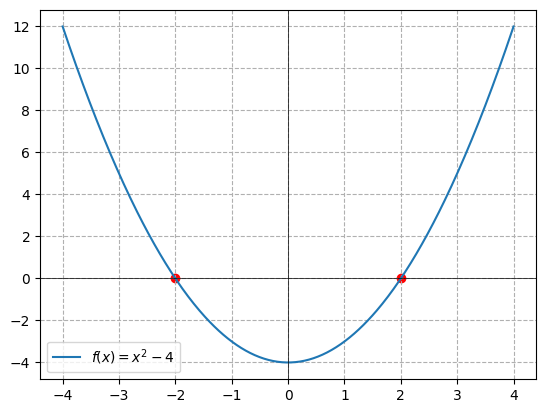

In [ ]:
x = np.linspace(-4,4, 400)
plt.plot(x,f1(x), label='$f(x) = x^2 - 4$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.scatter(raizes, [f1(raiz) for raiz in raizes], color='red')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

##### Função Trigonométrica \( f(x) = sen(x) \)

Neste caso, sabemos que sen(x) = 0 para \( x = 0, π, 2π, … \). Vamos usar o intervalo \([2, 4]\) para encontrar a raiz \( x = π \).

In [ ]:
def f2(x):
    return np.sin(x)

raiz, iteracoes = metodoBissecao(f2, 2, 4)
print(f"Raiz aproximada = {raiz}, Número de iterações = {iteracoes}")


Raiz aproximada = 3.1415939331054688, Número de iterações = 18


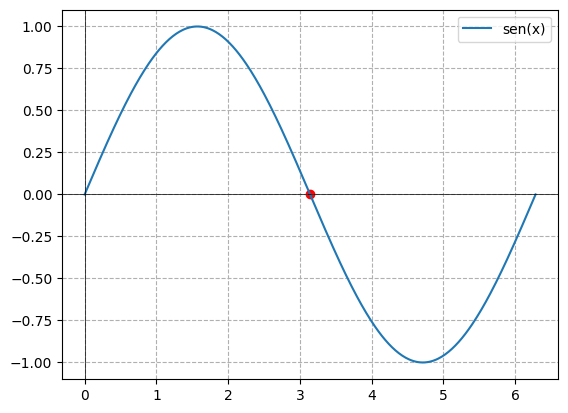

In [ ]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x)

plt.plot(x, y, label='sen(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, linestyle='--')
plt.scatter([raiz], [f2(raiz)], color='red')
plt.legend()
plt.show()


##### Função Exponencial \( f(x) = $e^x$ - 2 \)

Neste caso, temos uma raiz em \( x = $\ln(2)$ \). Vamos usar o intervalo \([0, 1]\).

In [ ]:
def f3(x):
    return np.exp(x) - 2

raiz, iteracoes = metodoBissecao(f3, 0, 1)
print(f"Raiz aproximada = {raiz}, Número de iterações = {iteracoes}")

Raiz aproximada = 0.6931533813476562, Número de iterações = 17


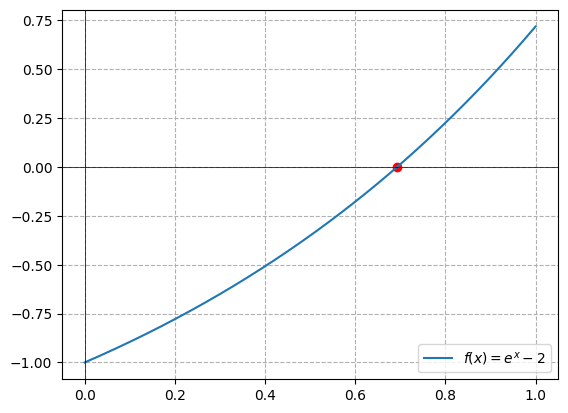

In [ ]:
x = np.linspace(0, 1, 400)

plt.plot(x, f3(x), label='$f(x) = e^x - 2$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, linestyle='--')
plt.scatter([raiz], [f3(raiz)], color='red')
plt.legend()
plt.show()

### **3. Método da Secante (Cordas):**

O Método da Secante é um método numérico iterativo para encontrar aproximações de raízes de uma função real de uma variável. Este método é uma variação do Método de Newton e não requer o cálculo da derivada da função. Ele é baseado na construção de uma secante à curva da função \( f(x) \) através de dois pontos e, então, encontrar o ponto onde esta secante cruza o eixo \( x \).

Como o algoritmo funciona:

1. **Inicialização**: O algoritmo começa com duas aproximações iniciais \( $x_{0}$ \) e \( $x_{1}$ \) para a raiz da função \( f(x) \). Ele também começa com uma contagem de iterações (`iteracao`) inicializada em zero.

2. **Loop Iterativo**: O algoritmo entra em um loop que executará, no máximo, `maxIteracao` vezes.

    - **Cálculo da Nova Aproximação**: Utiliza a fórmula da secante para calcular uma nova aproximação \( x$_2$ \) para a raiz.

    $$
x_{2} = x_1 - f(x_1) \left( \frac{x_1 - x_{0}}{f(x_1) - f(x_{0})} \right)
    $$

    - **Critério de Parada**: Verifica se a diferença absoluta entre \( x$_2$ \) e \( x$_1$ \) é menor que a tolerância (`tol`). Se for, o algoritmo termina e retorna \( x$_2$ \) como a raiz aproximada e o número de iterações realizadas.

    - **Atualização de \( x$_0$ \) e \( x$_1$ \)**: Se o critério de parada não for atendido, \( x$_0$ \) e \( x$_1$ \) são atualizados para \( x$_1$ \) e \( x$_2$ \), respectivamente, e o loop continua para a próxima iteração.

3. **Retorno**: Se o loop alcança `maxIteracao` iterações sem atender ao critério de parada, o algoritmo termina e retorna `None` para a raiz e o número de iterações realizadas.

Desta forma, o algoritmo busca uma aproximação precisa para a raiz de \( f(x) \) de uma maneira iterativa e eficiente.

In [ ]:
def metodoSecante(f, x0, x1, tol=1e-5, maxIteracao=100):
    iteracao = 0
    while iteracao < maxIteracao:
        x2 = x1 - f(x1) * ((x1 - x0) / (f(x1) - f(x0)))

        if abs(x2 - x1) < tol:
            return x2, iteracao + 1

        x0, x1 = x1, x2
        iteracao += 1

    return None, iteracao

##### Exemplo

Suponha que você queira encontrar a raiz da função \( f(x) = $x^2$ - 4 \) com aproximações iniciais \( x$_0$ = 0 \) e \( x$_1$ = 5 \).


In [ ]:
def f(x):
    return x**2 - 4

x0 = 0
x1 = 5

raiz, iteracoes = metodoSecante(f, x0, x1)
print(f"Raiz aproximada = {raiz}, Número de iterações = {iteracoes}")

Raiz aproximada = 1.9999999999987672, Número de iterações = 8


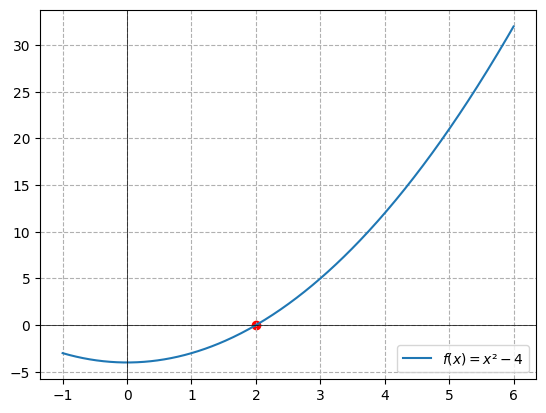

In [ ]:
x = np.linspace(-1, 6, 400)

plt.plot(x, f(x), label='$f(x) = x²-4$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, linestyle='--')
plt.scatter([raiz], [f(raiz)], color='red')
plt.legend()
plt.show()

### **4. Método Regula Falsi (Pégaso):**

 Similar ao método da bisseção, mas com uma abordagem diferente para escolher os pontos do intervalo, tornando-se frequentemente mais eficiente.

In [ ]:
def metodoRegulaFalsi(f, a, b, tol=1e-5, maxIteracao=100):
    fa, fb = f(a), f(b)
    if fa * fb >= 0:
        print("O Método do Regula Falsi requer que f(a) e f(b) tenham sinais opostos.")
        return None, None
    iteracao = 0

    while iteracao < maxIteracao:
        x = (a * fb - b * fa) / (fb - fa)
        fx = f(x)
        if abs(fx) < tol:
            return x, iteracao
        if fa * fx < 0:
            b, fb = x, fx
        else:
            a, fa = x, fx
        if abs(b - a) < tol:
            return (a + b) / 2, iteracao

        iteracao += 1

    return None, iteracao

##### Exemplo

Suponha que você queira encontrar a raiz da função \( f(x) = $x^2$ - 25 \) com aproximações iniciais \( x$_0$ = 3 \) e \( x$_1$ = 6 \).


In [ ]:
def f(x):
    return x**2 - 25

a = 3
b = 6

raiz, iteracoes = metodoRegulaFalsi(f, a, b)
print(f"Raiz aproximada = {raiz}, Número de iterações = {iteracoes}")

Raiz aproximada = 4.9999998717104726, Número de iterações = 6


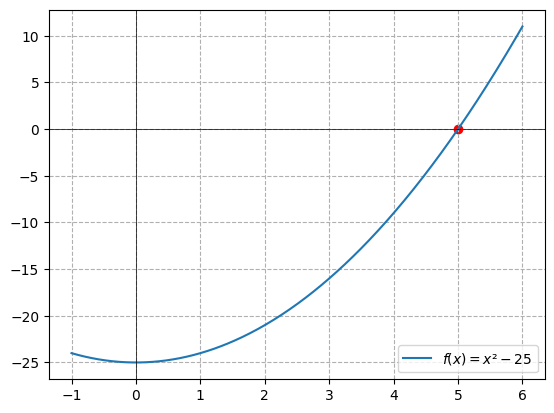

In [ ]:
x = np.linspace(-1, 6, 400)

plt.plot(x, f(x), label='$f(x) = x²-25$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, linestyle='--')
plt.scatter([raiz], [f(raiz)], color='red')
plt.legend()
plt.show()

### **5. Método de Newton:**

 Este é um dos métodos mais rápidos e amplamente usados para encontrar raízes de funções não-lineares. Requer o conhecimento da derivada da função.

Como o algoritmo funciona:

1. **Inicialização**: O algoritmo começa com uma aproximação inicial \( $x_{0}$ \) para a raiz da função \( f(x) \). Ele também começa com uma contagem de iterações (`iteracao`) inicializada em zero.

2. **Loop Iterativo**: O algoritmo entra em um loop que executará, no máximo, `maxIteracao` vezes.

    - **Cálculo da Nova Aproximação**: Utiliza a seguinte fórmula para calcular uma nova aproximação \( x$_1$ \) para a raiz.

    $$
x_{1} = x_0 - \left( \frac{f(x_0)}{f'(x_{0})} \right)
    $$

    - **Critério de Parada**: Verifica se a diferença absoluta entre \( x$_1$ \) e \( x$_0$ \) é menor que a tolerância (`tol`). Se for, o algoritmo termina e retorna \( x$_1$ \) como a raiz aproximada e o número de iterações realizadas.

    - **Atualização de \( x$_0$ \)**: Se o critério de parada não for atendido, \( x$_0$ \) é atualizado para \( x$_1$ \) e o loop continua para a próxima iteração.

3. **Retorno**: Se o loop alcança `maxIteracao` iterações sem atender ao critério de parada, o algoritmo termina e retorna `None` para a raiz e o número de iterações realizadas.

Desta forma, o algoritmo busca uma aproximação precisa para a raiz de \( f(x) \) de uma maneira iterativa e eficiente.

In [ ]:
def computarDerivada(function, parametro):
  x = Symbol('x')
  func = function(x)
  return func.diff(x).subs(x, parametro)


def metodoNewton(f, x0, tol=1e-5, maxIteracao=100):
    iteracao = 0

    while iteracao < maxIteracao:
        df = computarDerivada(f, x0)
        x1 = x0 - (f(x0) / df)

        if abs(x1 - x0) < tol:
            return x1, iteracao + 1

        x0 = x1
        iteracao += 1

    return None, iteracao

##### Exemplo

Suponha que você queira encontrar a raiz da função \( f(x) = $x^3$ + 27 \) com aproximação inicial de \( x$_0$ = 2 \).


In [ ]:
def f(x):
    return x**3 + 27

x0 = 2

raiz, iteracoes = metodoNewton(f, x0)
raiz = raiz.evalf()
print(f"Raiz aproximada = {raiz}, Número de iterações = {iteracoes}")

Raiz aproximada = -3.00000000000000, Número de iterações = 10


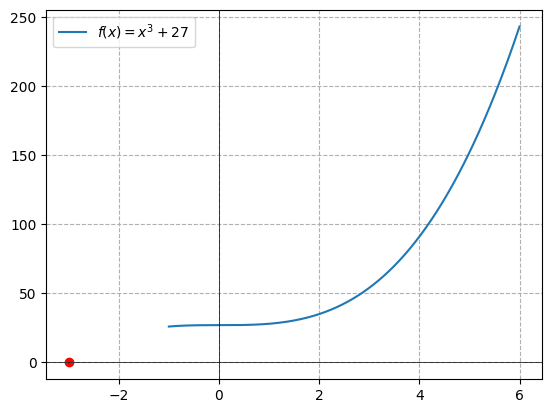

In [ ]:
x = np.linspace(-1, 6, 400)

plt.plot(x, f(x), label='$f(x) = x^3+27$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, linestyle='--')
plt.scatter([raiz], [f(raiz)], color='red')
plt.legend()
plt.show()

### **6. Método do Ponto Fixo (Iteração Linear):**

 Este método é utilizado para encontrar um ponto em que a função cruza a linha
y=x, também conhecido como "ponto fixo" da função.



Como o algoritmo funciona:

1. **Inicialização**: O algoritmo começa com uma aproximação inicial \( $x_{0}$ \) e com a definição de uma função de iteração \( F(x) \), na qual será aplicada a aproximação inicial. Ele também começa com uma contagem de iterações (`iteracao`) inicializada em zero.

2. **Loop Iterativo**: O algoritmo entra em um loop que executará, no máximo, `maxIteracao` vezes.

    - **Cálculo da Nova Aproximação**: O cálculo de cada aproximacação é feita a partir da aplicação do \( $x_{0}$ \) na função de iteração. Cada valor obtido vai sendo aplicado na função caso o método execute por ais uma iteração.

    - **Critério de Parada**: Verifica se a diferença absoluta entre \( x$_1$ \) e \( x$_0$ \) é menor que a tolerância (`tol`). Se for, o algoritmo termina e retorna \( x$_1$ \) como a raiz aproximada e o número de iterações realizadas.

    - **Atualização de \( x$_0$ \)**: Se o critério de parada não for atendido, \( x$_0$ \) é atualizado para \( x$_1$ \) e o loop continua para a próxima iteração.

3. **Retorno**: Se o loop alcança `maxIteracao` iterações sem atender ao critério de parada, o algoritmo termina e retorna `None` para a raiz e o número de iterações realizadas.

Desta forma, o algoritmo busca uma aproximação precisa para a raiz de \( f(x) \) de uma maneira iterativa e eficiente.

In [ ]:
def metodoPontoFixo(f, x0, tol=1e-5, maxIteracao=100):
    iteracao = 0

    while iteracao < maxIteracao:
        x1 = f(x0)

        if abs(x1 - x0) < tol:
            return x1, iteracao + 1

        x0 = x1
        iteracao += 1

    return None, iteracao

##### Exemplo

Suponha que você queira encontrar a raiz da função \( f(x) = $x^2$ - sen(x) \) com aproximação inicial de \( x$_0$ = 0.9 \).

Função de Iteração: \(F(x) = $\sqrt sen(x)$\)

In [ ]:

def funcaoIteracao(x):
    return np.sqrt(np.sin(x))

x0 = 0.9

raiz, iteracoes = metodoPontoFixo(funcaoIteracao, x0, 0.0002)
print(f"Raiz aproximada = {raiz}, Número de iterações = {iteracoes}")

Raiz aproximada = 0.876779482424363, Número de iterações = 6


<ipython-input-87-b4d80041b19a>:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.sin(x))


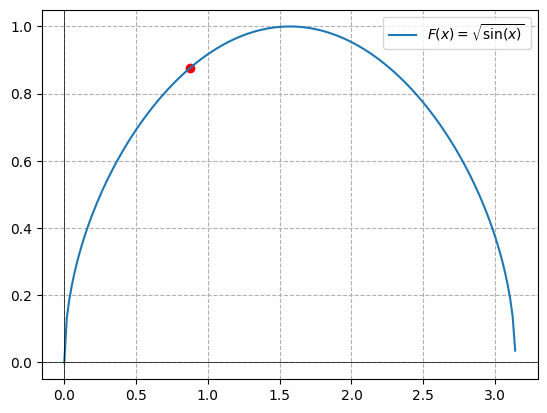

In [ ]:
x = np.linspace(-1, 6, 400)

plt.plot(x, funcaoIteracao(x), label='$F(x) = \sqrt{\sin(x)}$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, linestyle='--')
plt.scatter([raiz], [funcaoIteracao(raiz)], color='red')
plt.legend()
plt.show()